In [75]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from movie_sentiment.ml_logic.movie_score import movie_score
from sklearn.metrics import r2_score

# def script_2_polynomial(script_score, plot = False):
#     '''
#     This function receives the script_score (1d array) and tries to fit it on a polynomial of degree3 or 5. 
#     Returns the polinomial coefficients as a list on length max_degree + 1.
    
#     plot: if you want to see the score and fit plot, change to True    
#     '''
    
#     degree = 3
#     x_fit = np.arange(script_score.shape[0])
#     coefficients = np.polyfit( x=np.arange(script_score.shape[0]), y=script_score, deg=degree)
#     y_fit = np.polyval(coefficients, x_fit)
    
#     r2 = r2_score(script_score, y_fit)
#     print('Initial R2 of the fit = ', f'{r2:.2f}')
    
#     max_degree = 10
#     while r2 < 0.75 and degree < max_degree:
        
#         degree += 1
#         coefficients = np.polyfit( x=np.arange(script_score.shape[0]), y=script_score, deg=degree)
#         y_fit = np.polyval(coefficients, x_fit)
#         r2 = r2_score(script_score, y_fit)
#         print('Improved R2 of the fit = ', f'{r2:.2f}')
        
    
#     print('Final R2 of the fit = ', f'{r2:.2f}', f'poly degree={degree}')
#     print('Next movie!')
        
#     if plot == True: 
        
#         #plotting the actual score and the fitted curve
#         plt.plot(x_fit, script_score)
#         plt.plot(x_fit, y_fit, 'r')
#         plt.ylim(-1,1)
#         labels = ['Score', f'Fit (R2={r2:.2f})']
#         plt.legend(labels)
        
#     coefficients = [0]*(max_degree+1 - coefficients.shape[0]) + list(coefficients)

    
#     return coefficients
    

In [3]:
movie_title = 'Titanic_0120338.txt'
X = movie_score(movie_title, chunk_type='words', pad=40, group_chunk=5, window_size=50)

In [ ]:
import os
movie_list = os.listdir('./raw_data/screenplay_data/data/raw_texts/raw_texts')

In [ ]:
from movie_sentiment.ml_logic.movie_score import movie_score
#from movie_sentiment.ml_logic.polynomial import script_2_polynomial

coeff_list = []
counter = 0
for movie in movie_list:
    score = movie_score(movie, chunk_type='sentence', pad=50, group_chunk=10, window_size=50)
    coeffs = script_2_polynomial(score, plot=False)
    plt.show()
    
    coeff_list.append([movie, coeffs])
    counter +=1
    if counter > 50:
        print('500 movies scanned!✔️')
        break
    
    
    
    

In [173]:
# imorting the scores and the polynomials
from movie_sentiment.processing.arcs import get_all_polynomials, get_all_arcs
all_scores = get_all_arcs()

Loading data from pickle file


In [177]:
type(all_scores)

dict

In [185]:
from movie_sentiment.processing.reshape_arc import reshaping_arc
all_score_reshaped = {}

for key, value in all_scores.items():
    all_score_reshaped[key] = np.array(reshaping_arc(value))

In [189]:
all_score_reshaped['Dark City'].shape

(30,)

In [190]:
# standardizing 
from sklearn.preprocessing import StandardScaler

dict_scaled = {}

for key, value in all_score_reshaped.items():
    scaler = StandardScaler()
    value = value.reshape(-1,1)
    value_scaled = scaler.fit_transform(value)
    value_scaled = value_scaled.reshape(-1,)
    dict_scaled[key] = value_scaled    
    

In [256]:
# MinMax 
from sklearn.preprocessing import MinMaxScaler

dict_scaled = {}

for key, value in all_score_reshaped.items():
    scaler = MinMaxScaler()
    value = value.reshape(-1,1)
    value_scaled = scaler.fit_transform(value)
    value_scaled = value_scaled.reshape(-1,)
    dict_scaled[key] = value_scaled  

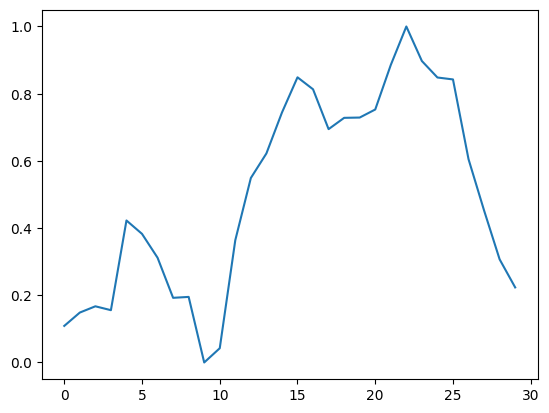

In [257]:
plt.plot(dict_scaled['Dark City'])

In [258]:
# call the polynomial to get the coefficients 
from movie_sentiment.ml_logic.polynomial import script_2_polynomial

dict_poly_scaled = {}
for key, value in dict_scaled.items():
    dict_poly_scaled[key] = script_2_polynomial(value)

    

In [259]:
import pandas as pd
coefficient_df = pd.DataFrame(dict_poly_scaled).T

In [260]:
coefficient_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10
Dark City,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.000292,0.010748,-0.067713,0.259567
Slay the Dreamer IMDb,0.0,0.0,0.0,0.0,0.0,-0.000003,0.000241,-0.006122,0.064489,-0.280896,0.980816
The Deep End of the Ocean,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,-0.000034,0.001414,-0.043514,0.935785


In [262]:
coefficient_df.iloc[0]

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7    -0.000292
8     0.010748
9    -0.067713
10    0.259567
Name: Dark City, dtype: float64

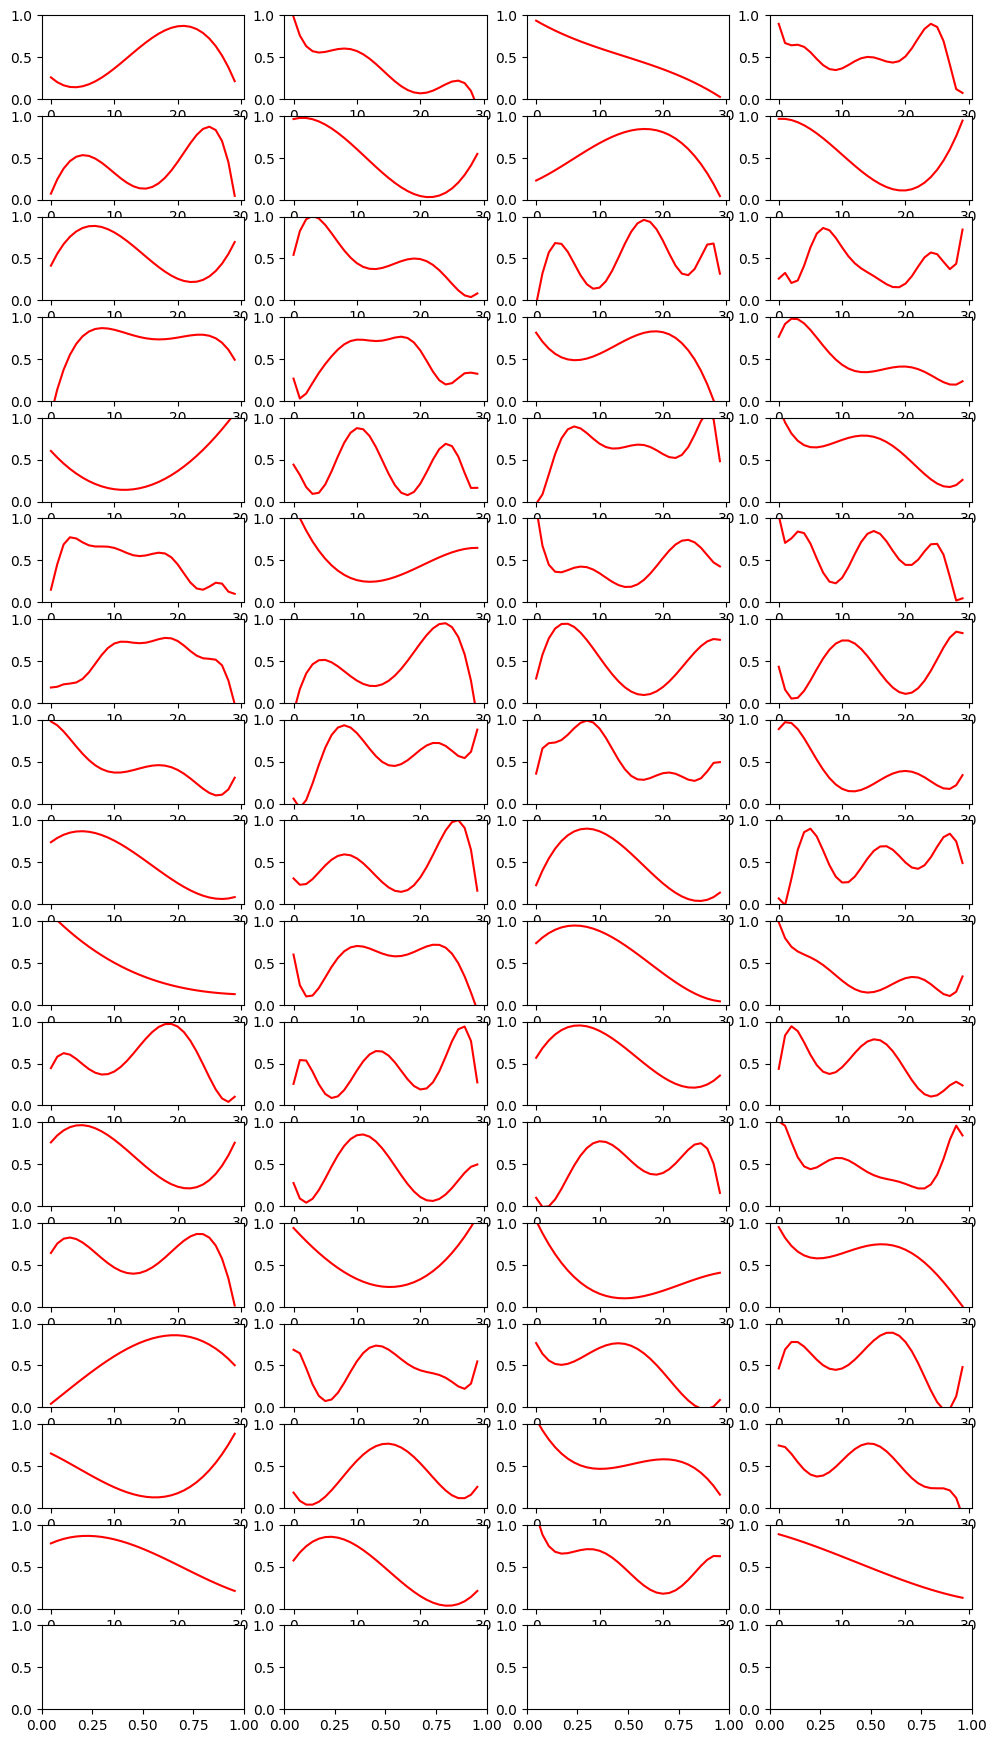

In [290]:
import matplotlib.pyplot as plt


movie_count = 64
fix, axes = plt.subplots(int(movie_count/4)+1, 4, figsize = (6*2, (int(movie_count/3)+1)*1))

for i in range(movie_count):
    x_fit = np.arange(30)
    y_fit = np.polyval(coefficient_df.iloc[i], x_fit)
    
    
    #row
    row = int(i/4)
    #col [0 1 2 3]
    col = i%4
    
    axes[row, col].plot(x_fit, y_fit, 'r')
    #axes[row, col].plot(x_fit, y_fit, 'r')  
    axes[row, col].set_ylim(0,1)
    

In [264]:
# Doing the Kmeans before PCA

from sklearn.cluster import KMeans
kmean_model = KMeans(n_clusters=6, n_init=200)
kmean_model.fit(coefficient_df)



KMeans(n_clusters=6, n_init=200)

In [265]:
centers = kmean_model.cluster_centers_
centers.shape

(6, 11)

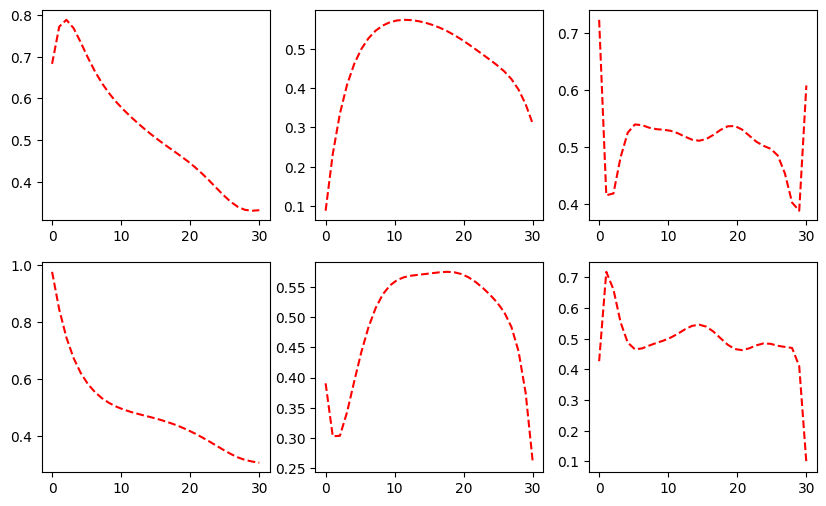

In [266]:
fix, axes = plt.subplots(2,3, figsize= (10,6))

for i in range(centers.shape[0]):
    row = int(i/3)
    col= i%3
    
    x_fit = np.linspace(0,30,30)
    y_fit = np.polyval(centers[i], x_fit)
    
    axes[row,col].plot(x_fit, y_fit, 'r--')
    

In [267]:
# doing the PCA 
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(coefficient_df)

PCA()

In [268]:
W = pca.components_
W = pd.DataFrame(W.T, columns= [f'PC{i}' for i in range(1, 12)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.199614e-11,2.376747e-11,1.267430e-10,-8.818763e-10,9.622575e-09,1.426415e-07,-0.000003,-5.436981e-05,-1.310920e-03,-3.478068e-02,9.993941e-01
1,1.830487e-09,-3.622115e-09,-1.893377e-08,1.272537e-07,-1.284953e-06,-1.697019e-05,0.000254,4.315683e-03,7.234902e-02,9.967633e-01,3.478426e-02
2,-1.200701e-07,2.372409e-07,1.207252e-06,-7.735549e-06,7.062791e-05,7.993882e-04,-0.009564,-1.134413e-01,-9.908581e-01,7.237169e-02,1.212744e-03
3,4.428539e-06,-8.740225e-06,-4.282303e-05,2.563174e-04,-2.042245e-03,-1.859780e-02,0.158545,9.806170e-01,-1.135255e-01,3.952194e-03,4.237874e-05
4,-1.008951e-04,1.990819e-04,9.220882e-04,-4.986972e-03,3.267422e-02,2.126658e-01,-0.963516,1.588748e-01,-8.700972e-03,1.925946e-04,1.485624e-06
5,1.469655e-03,-2.901953e-03,-1.230409e-02,5.671241e-02,-2.722666e-01,-9.362887e-01,-0.213532,1.611940e-02,-5.589558e-04,8.843700e-06,5.232273e-08
6,-1.371213e-02,2.705026e-02,9.879129e-02,-3.448264e-01,8.910824e-01,-2.749210e-01,-0.028358,1.317716e-03,-3.256673e-05,3.926371e-07,1.856166e-09
7,8.013299e-02,-1.554086e-01,-4.285580e-01,8.117256e-01,3.531093e-01,-4.660127e-02,-0.002948,9.529381e-05,-1.790570e-06,1.714005e-08,6.665926e-11
8,-2.824620e-01,4.935905e-01,6.843058e-01,4.498263e-01,7.699950e-02,-6.049704e-03,-0.000265,6.411619e-06,-9.557739e-08,7.488242e-10,2.450332e-12
9,5.977987e-01,-5.560511e-01,5.632839e-01,1.264972e-01,1.237287e-02,-6.714015e-04,-0.000022,4.189464e-07,-5.158165e-09,3.396272e-11,9.504203e-14


In [269]:
coefficient_df_proj = pca.transform(coefficient_df)
coefficient_df_proj = pd.DataFrame(coefficient_df_proj, columns=[f'PC{i}' for i in range(1, 12)])
coefficient_df_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.221074,0.271792,-0.076480,-0.011395,-0.000647,0.000015,7.417443e-09,4.187440e-09,-7.552969e-11,3.001018e-13,-3.264027e-16
1,-0.459935,-0.050920,-0.053088,-0.001191,0.000287,-0.000011,1.066414e-07,-9.786058e-09,1.068137e-10,-5.764401e-14,-1.200040e-15
2,-0.266135,-0.185739,0.028326,0.004377,0.000222,-0.000006,-8.113647e-08,3.247805e-10,7.908657e-12,-1.178308e-13,-6.715383e-16
3,-0.546683,0.192291,0.017899,0.008196,-0.001134,0.000008,-8.491460e-07,-2.336680e-08,-1.621870e-10,3.597164e-13,-4.694481e-16
4,0.523785,0.233900,0.020641,0.002672,-0.000079,0.000020,9.581110e-07,-1.358637e-08,1.133466e-11,6.740606e-13,-8.424550e-16
...,...,...,...,...,...,...,...,...,...,...,...
2766,0.276229,0.149356,0.004613,0.002501,0.000296,-0.000017,-4.582190e-07,6.354646e-09,-5.343235e-11,9.796767e-14,-2.151850e-16
2767,0.487744,0.257232,0.044040,-0.002685,-0.001042,-0.000019,-1.547711e-06,-1.293998e-08,6.394918e-11,-1.185570e-13,4.631186e-17
2768,0.128576,-0.025181,0.054948,0.010252,0.000737,-0.000028,-5.023352e-07,4.129363e-09,-8.797871e-12,-1.129764e-13,-1.844082e-16
2769,0.518772,0.236374,0.024135,0.005778,0.000489,-0.000020,-3.306262e-07,1.689670e-09,-8.737821e-13,-1.507274e-14,1.031626e-15


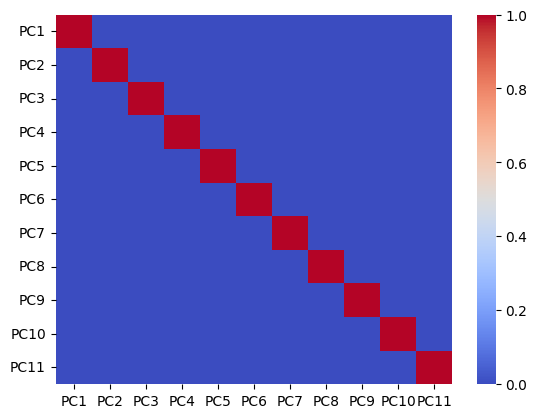

In [270]:
import seaborn as sns
sns.heatmap(coefficient_df_proj.corr(), cmap='coolwarm');

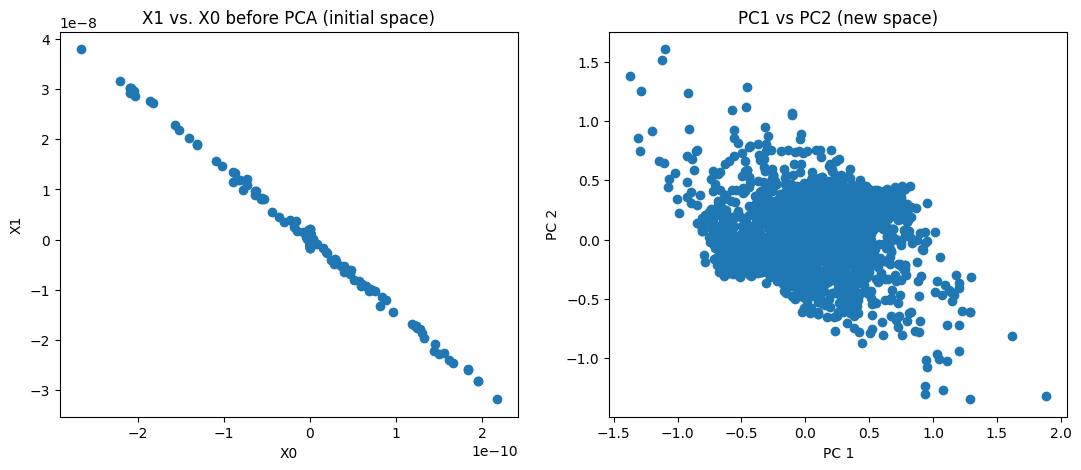

In [271]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(coefficient_df.iloc[:,0], coefficient_df.iloc[:,1])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(coefficient_df_proj.iloc[:,0], coefficient_df_proj.iloc[:,1]);

In [272]:
pca.explained_variance_ratio_


array([6.20730860e-01, 3.40798122e-01, 3.77956678e-02, 6.72534688e-04,
       2.81215889e-06, 3.91879703e-09, 1.89049742e-12, 4.08732853e-16,
       3.15730401e-20, 6.81669944e-25, 2.15784184e-30])

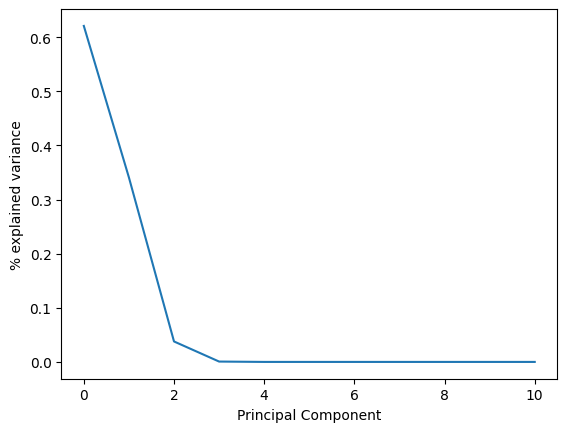

In [273]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

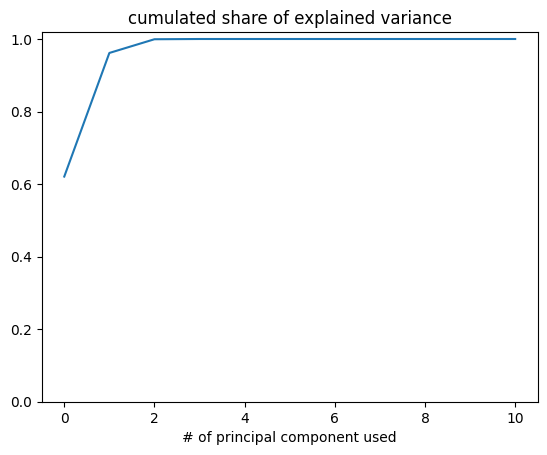

In [274]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

In [275]:
# Doing the Kmeans after PCA

from sklearn.cluster import KMeans
kmean_model = KMeans(n_clusters=9, n_init=200)
kmean_model.fit(coefficient_df_proj)

KMeans(n_clusters=9, n_init=200)

In [276]:
centers = kmean_model.cluster_centers_
centers.shape
centers_reconstructed = pca.inverse_transform(coefficient_df_proj)
centers_reconstructed.shape[0]

2771

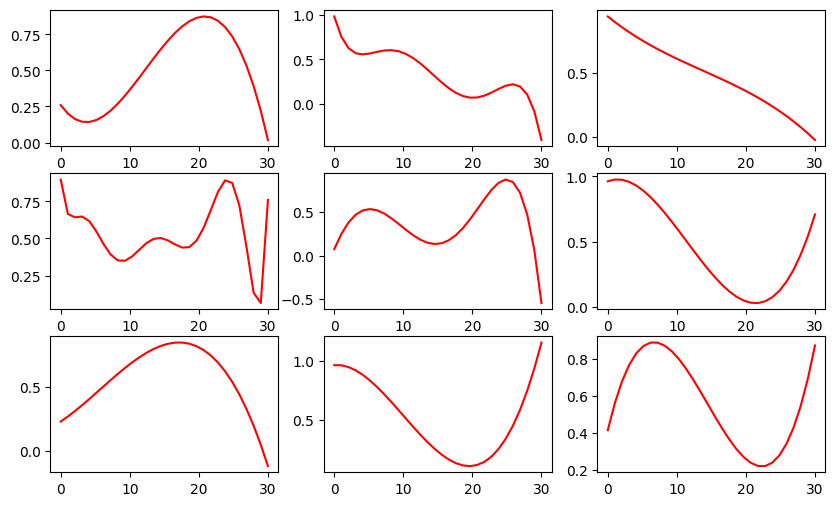

In [277]:
fix, axes = plt.subplots(3,3, figsize= (10,6))

for i in range(centers.shape[0]):
    row = int(i/3)
    col= i%3
    
    x_fit = np.linspace(0,30,30)
    y_fit = np.polyval(centers_reconstructed[i], x_fit)
    
    axes[row,col].plot(x_fit, y_fit, 'r')
    

In [286]:
np.unique(kmean_model.labels_)


array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [278]:
# shorter PCA
# Fit a PCA with only 3 components
pca3 = PCA(n_components=3).fit(coefficient_df)

# Project your data into 3 dimensions
coefficient_df_proj3 = pd.DataFrame(pca3.fit_transform(coefficient_df))

# We have "compressed" our dataset in 3D
coefficient_df_proj3

,0,1,2
0,0.221074,0.271792,-0.076480
1,-0.459935,-0.050920,-0.053088
2,-0.266135,-0.185739,0.028326
3,-0.546683,0.192291,0.017899
4,0.523785,0.233900,0.020641
...,...,...,...
2766,0.276229,0.149356,0.004613
2767,0.487744,0.257232,0.044040
2768,0.128576,-0.025181,0.054948
2769,0.518772,0.236374,0.024135


In [279]:
kmean_model = KMeans(n_clusters=9, n_init=200)
kmean_model.fit(coefficient_df_proj3)
centers = kmean_model.cluster_centers_
centers.shape


(9, 3)

In [280]:
centers_reconstructed3 = pca3.inverse_transform(coefficient_df_proj3)
centers_reconstructed3.shape[0]

2771

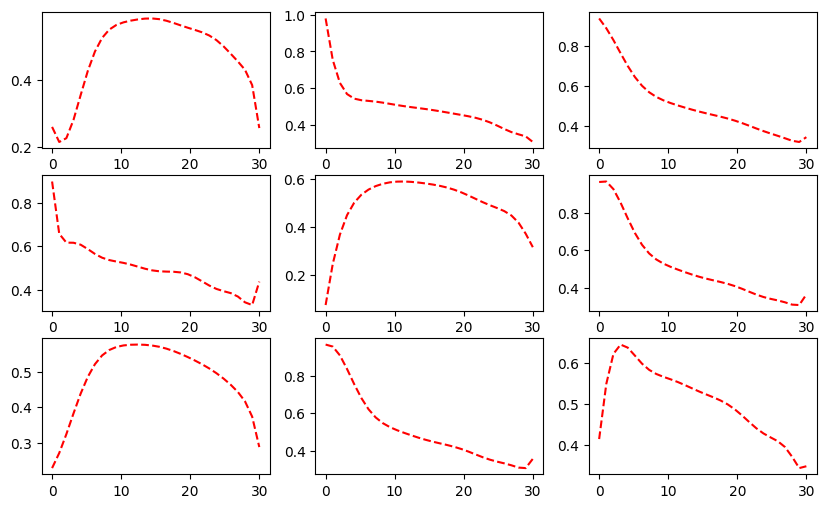

In [282]:
fix, axes = plt.subplots(3,3, figsize= (10,6))

for i in range(centers.shape[0]):
    row = int(i/3)
    col= i%3
    
    x_fit = np.linspace(0,30,30)
    y_fit = np.polyval(centers_reconstructed3[i], x_fit)
    
    axes[row,col].plot(x_fit, y_fit, 'r--')

    

In [291]:
#Using derivatives
def calculate_first_derivative(values, step_size):
    """
    Calculates the first derivative of a series of values using the finite difference method.
    
    Args:
        values (list): A list of numeric values representing the function values.
        step_size (float): The spacing between the values.
        
    Returns:
        list: A list of calculated first derivative values.
    """
    derivative = []
    n = len(values)
    
    for i in range(1, n-1):
        derivative_value = (values[i+1] - values[i-1]) / (2 * step_size)
        derivative.append(derivative_value)
    
    return derivative


In [303]:
def calculate_second_derivative(values, step_size):
    """
    Calculates the second derivative of a series of values using the finite difference method.
    
    Args:
        values (list): A list of numeric values representing the function values.
        step_size (float): The spacing between the values.
        
    Returns:
        list: A list of calculated second derivative values.
    """
    derivative = []
    n = len(values)
    
    for i in range(1, n-1):
        derivative_value = (values[i+1] - 2 * values[i] + values[i-1]) / (step_size ** 2)
        derivative.append(derivative_value)
    
    return derivative


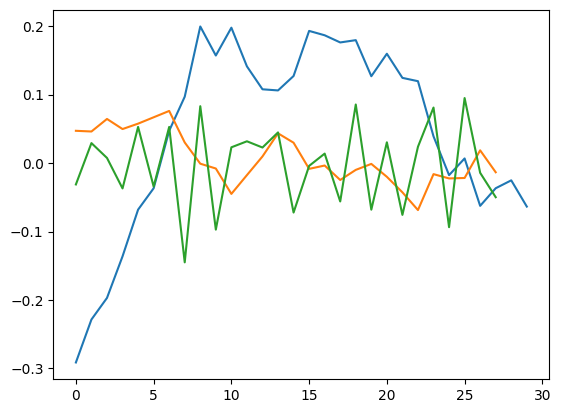

In [304]:
my_list = list(all_score_reshaped['Daredevil'])
my_list_1derivative = calculate_first_derivative(my_list, 1)
my_list_2derivative = calculate_second_derivative(my_list,1)
plt.plot(my_list)
plt.plot(my_list_1derivative)
plt.plot(my_list_2derivative)

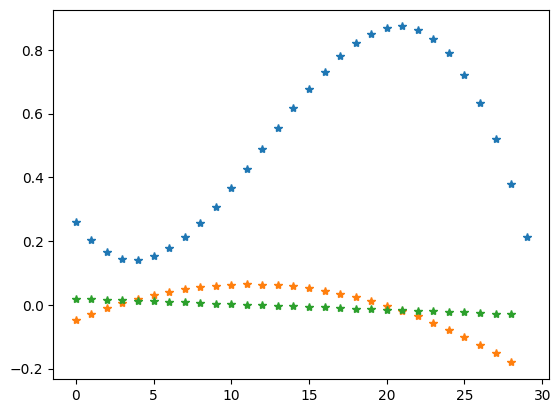

In [316]:
coeffs = coefficient_df.iloc[0]
deriv_coeffs = np.polyder(coeffs)
deriv2_coeffs = np.polyder(deriv_coeffs)

x = np.arange(30)
y = np.polyval(coeffs, x)
x2 = np.arange(1,30)
y2 = np.polyval(deriv_coeffs, x2)
x3 = np.arange(1,30)
y3 = np.polyval(deriv2_coeffs, x3)
plt.plot(y, '*')
plt.plot(y2, '*')
plt.plot(y3, '*')

In [317]:
# let make a df for first derivative
coefficient_df

,0,1,2,3,4,5,6,7,8,9,10
Dark City,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-0.000292,0.010748,-0.067713,0.259567
Slay the Dreamer IMDb,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,-0.000003,0.000241,-0.006122,0.064489,-0.280896,0.980816
The Deep End of the Ocean,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-0.000034,0.001414,-0.043514,0.935785
Salt,0.0,0.0,6.686458e-09,-7.528376e-07,0.000034,-0.000808,0.010513,-0.074176,0.261729,-0.426837,0.897951
The Truman Show,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,-0.000002,0.000073,-0.000150,-0.020627,0.190810,0.072801
...,...,...,...,...,...,...,...,...,...,...,...
If I Had a Hammer,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000016,-0.003448,0.080787,0.310054
Fortune Cookie,0.0,0.0,3.921874e-09,-4.371360e-07,0.000019,-0.000415,0.004510,-0.021378,0.014598,0.168782,0.087765
Its A Wonderful Lifetime,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000185,-0.009927,0.118911,0.541058
Rocky Balboa,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000291,-0.014158,0.188806,0.075515


In [319]:
dict_poly_scaled['Damien Omen II']
dict_derivatives = {}
for key, value in dict_poly_scaled.items():
    dict_derivatives[key] = np.polyder(value)
    

In [325]:
coefficient_df = pd.DataFrame(dict_derivatives).T

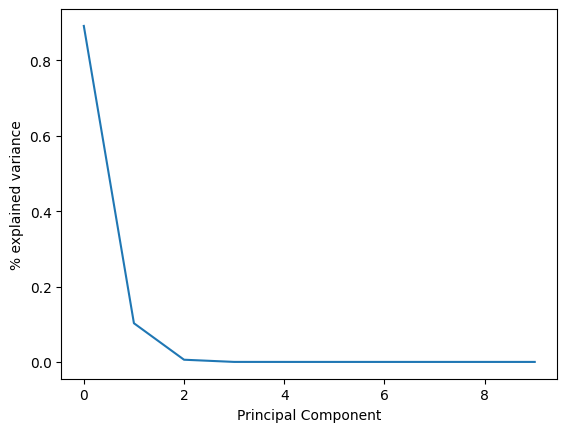

In [327]:
# doing the PCA 
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(coefficient_df)
coefficient_df_proj = pca.transform(coefficient_df)
coefficient_df_proj = pd.DataFrame(coefficient_df_proj, columns=[f'PC{i}' for i in range(1, 11)])
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

In [331]:
# Doing the Kmeans after PCA

from sklearn.cluster import KMeans
kmean_model = KMeans(n_clusters=6, n_init=200)
kmean_model.fit(coefficient_df_proj)

KMeans(n_clusters=6, n_init=200)

In [332]:
centers = kmean_model.cluster_centers_
centers.shape
centers_reconstructed = pca.inverse_transform(coefficient_df_proj)

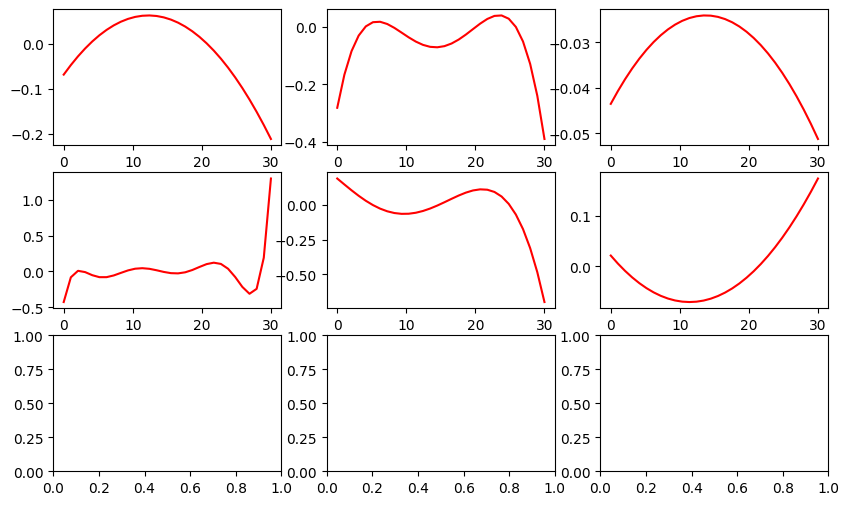

In [333]:
fix, axes = plt.subplots(3,3, figsize= (10,6))

for i in range(centers.shape[0]):
    row = int(i/3)
    col= i%3
    
    x_fit = np.linspace(0,30,30)
    y_fit = np.polyval(centers_reconstructed[i], x_fit)
    
    axes[row,col].plot(x_fit, y_fit, 'r')
    

In [353]:
#second derivatives

dict_sec_derivatives = {}
for key, value in dict_derivatives.items():
    dict_sec_derivatives[key] = np.polyder(value)



In [354]:
coefficient_df = pd.DataFrame(dict_sec_derivatives).T

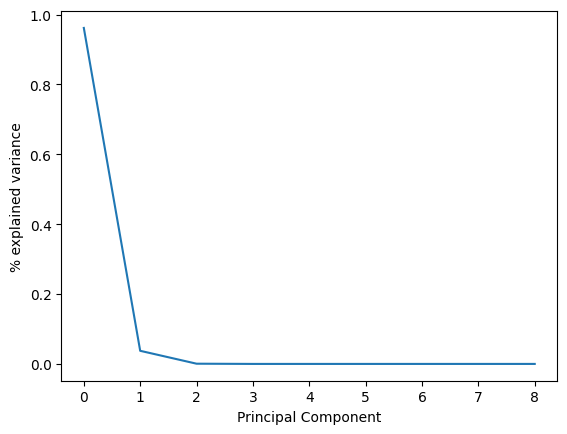

In [356]:
# doing the PCA 
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(coefficient_df)
coefficient_df_proj = pca.transform(coefficient_df)
coefficient_df_proj = pd.DataFrame(coefficient_df_proj, columns=[f'PC{i}' for i in range(1, 10)])
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

In [360]:
# Doing the Kmeans after PCA

from sklearn.cluster import KMeans
kmean_model = KMeans(n_clusters=12, n_init=200)
kmean_model.fit(coefficient_df_proj)

KMeans(n_clusters=12, n_init=200)

In [361]:
centers = kmean_model.cluster_centers_
centers.shape
centers_reconstructed = pca.inverse_transform(coefficient_df_proj)

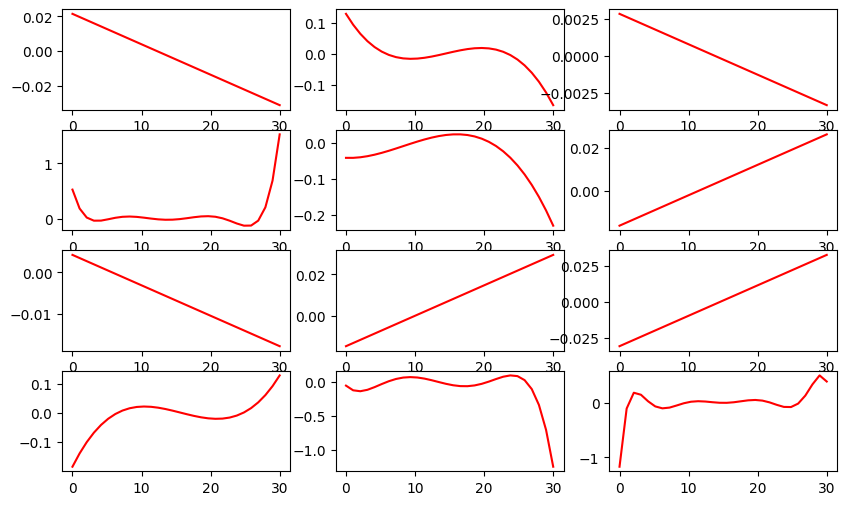

In [362]:
fix, axes = plt.subplots(4,3, figsize= (10,6))

for i in range(centers.shape[0]):
    row = int(i/3)
    col= i%3
    
    x_fit = np.linspace(0,30,30)
    y_fit = np.polyval(centers_reconstructed[i], x_fit)
    
    axes[row,col].plot(x_fit, y_fit, 'r')

In [372]:
# for each movie, there are 3 featuers, each is a list
a = {}
a['test'] = [np.array([1,2]), np.array(3,), 3]

In [381]:
a

{'test': [array([1, 2]), array(3), 3]}